<a href="https://colab.research.google.com/github/zdanielshi/data_science_LFZ/blob/main/DS_0628_Kaggle_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [503]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

from google.colab import drive

In [504]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [505]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Colab data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Colab data/test.csv')

In [506]:
train.shape

(1460, 81)

In [507]:
test.shape

(1459, 80)

# Stacking the two tables
Also separating out price feature into it's own column

In [508]:
y = pd.DataFrame(train['SalePrice'])

In [509]:
y.describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


In [510]:
# train.drop(columns = 'SalePrice', inplace=True)

In [511]:
x = pd.concat([train.drop(columns='SalePrice'), test], axis = 0)

In [512]:
x

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


Plan of attack
* Analysis
* Clean up
  * Nulls
  * Outlier values
* Feature engineering
* Numericals to categoricals
* Ordinals
* Do some correlation and pairplotting
* Drop columns
  * Use the xnum threshold method
* Preprocessing
  * Transforming
  * Scaling
  * Encoding
* Regression and analysis

# Analysis

In [513]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fad04dcc9d0>]],
      dtype=object)

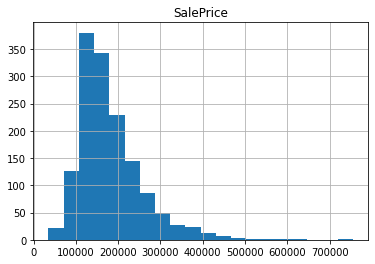

In [514]:
y.hist(bins = 20)

Correlations

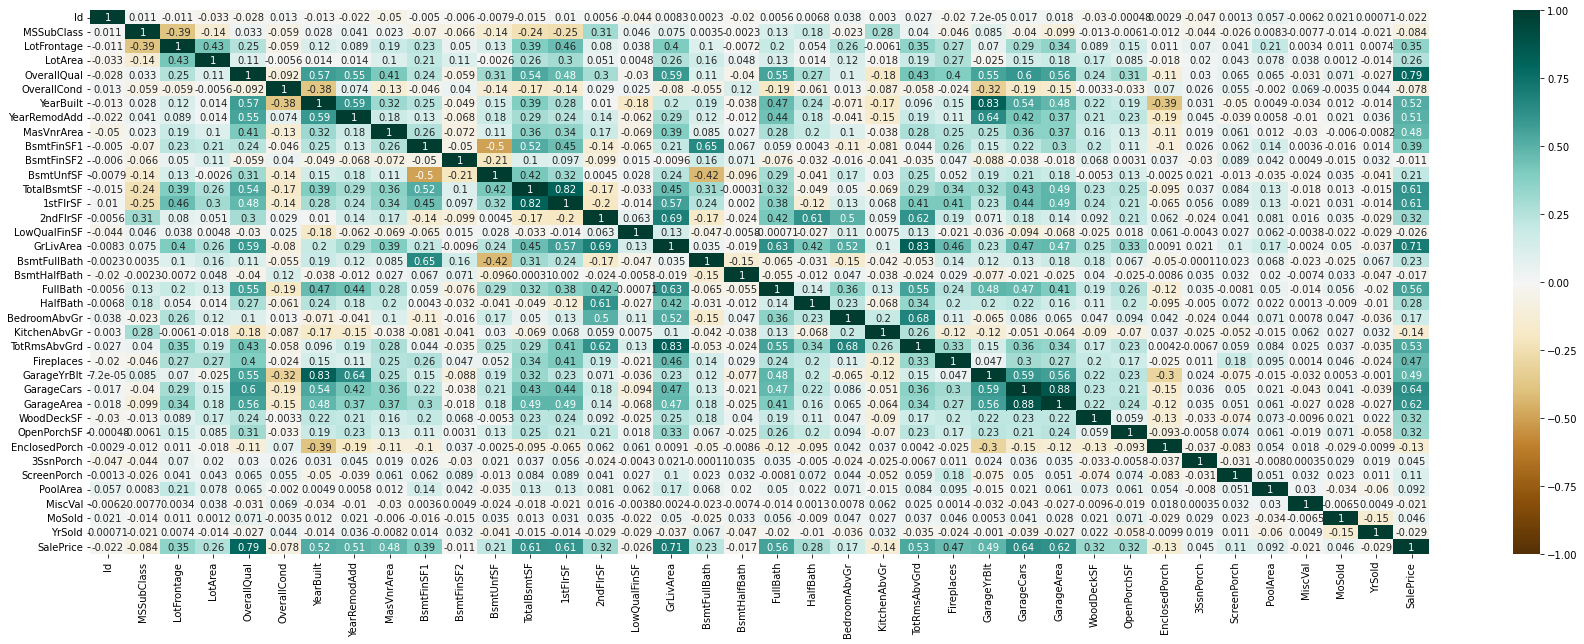

In [515]:
plt.figure(figsize =(30,10))
heatmap = sns.heatmap(train.corr(), annot=True, vmin = -1, vmax = 1, cmap = 'BrBG')

In [516]:
num_corr_threshold = 0.5 # set a threshold for the correlation level of numerical values
xnum_high_corr = xnum_high_corr[xnum_high_corr > num_corr_threshold]

In [517]:
list_xnum_high_corr = xnum_high_corr.index.tolist()
list_xnum_high_corr

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd']

In [518]:
xnum = train.select_dtypes(exclude='object')
xnum.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [519]:
xcat = train.select_dtypes(include='object')

In [520]:
xcat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


## Clean up

### First pass dropping nulls - if there are categories with too many nulls

In [521]:
null_drop_threshold = len(x) * 0.3 # threshold to drop null values
null_drop_threshold

875.6999999999999

In [522]:
x_nulls = x.isnull().sum().sort_values(ascending=False)
x_nulls = x_nulls[x_nulls > null_drop_threshold]
list_x_nulls = list(x_nulls.index)
list_x_nulls

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']

In [523]:
x.drop(columns = list_x_nulls, inplace=True)

In [524]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

Filling in nulls

In [525]:
isnull = x.isnull().sum().sort_values(ascending=False)
isnull = isnull[isnull > 0]
len(isnull)

29

In [526]:
isnull_under_100 = isnull[isnull < 100]
list_isnull_under_100 = isnull_under_100.index.tolist()

list_isnull_under_100

['BsmtExposure',
 'BsmtCond',
 'BsmtQual',
 'BsmtFinType2',
 'BsmtFinType1',
 'MasVnrType',
 'MasVnrArea',
 'MSZoning',
 'Functional',
 'BsmtHalfBath',
 'Utilities',
 'BsmtFullBath',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'KitchenQual',
 'Electrical',
 'TotalBsmtSF',
 'Exterior2nd',
 'GarageCars',
 'SaleType',
 'Exterior1st',
 'GarageArea']

In [527]:
for i in list_isnull_under_100:
  try:
    x[i].fillna(x[i].median()[0], inplace=True)
  except:
    x[i].fillna(x[i].mode()[0], inplace=True)

In [528]:
isnull = x.isnull().sum().sort_values(ascending=False)
isnull = isnull[isnull > 0]
isnull

LotFrontage     486
GarageYrBlt     159
GarageCond      159
GarageFinish    159
GarageQual      159
GarageType      157
dtype: int64

In [529]:
x.groupby('LotConfig')['LotFrontage'].median()

LotConfig
Corner     80.0
CulDSac    50.0
FR2        62.0
FR3        66.0
Inside     66.0
Name: LotFrontage, dtype: float64

In [530]:
x.LotFrontage.fillna(x.groupby('LotConfig')['LotFrontage'].transform('median'),inplace=True)

In [531]:
isnull = x.isnull().sum().sort_values(ascending=False)
isnull = isnull[isnull > 0]
isnull

GarageYrBlt     159
GarageCond      159
GarageFinish    159
GarageQual      159
GarageType      157
dtype: int64

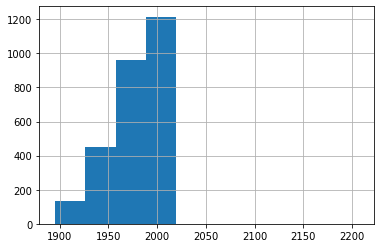

In [532]:
x.GarageYrBlt.hist()

In [533]:
x.GarageYrBlt.corr(x.YearBuilt)

0.8348123731631014

In [534]:
# fill using the year that the house was built.
x.GarageYrBlt.fillna(x.groupby('YearBuilt')['GarageYrBlt'].transform('median'),inplace=True)

In [535]:
# fill remainders using the year that the house built
x.GarageYrBlt.fillna(x.YearBuilt, inplace=True)

In [536]:
x.GarageYrBlt.isnull().sum()

0

In [537]:
x.GarageCond.value_counts()

TA    2654
Fa      74
Gd      15
Po      14
Ex       3
Name: GarageCond, dtype: int64

In [538]:
# just use TA
x.GarageCond.fillna(x.GarageCond.mode()[0], inplace=True)

In [539]:
x.GarageCond.isnull().sum()

0

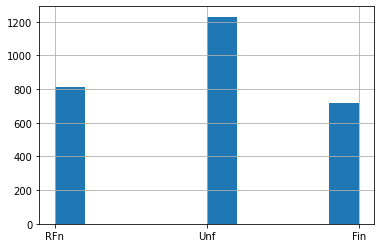

In [540]:
x.GarageFinish.hist()

In [541]:
# NA actually indicates "no garage", so make it a new category
x.GarageFinish.fillna('None', inplace=True)

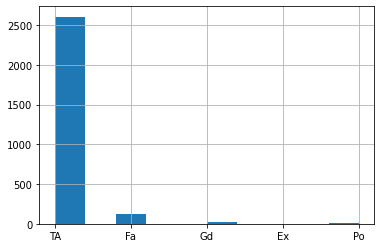

In [542]:
x.GarageQual.hist()

In [556]:
x.GarageQual.fillna(x.GarageQual.mode()[0],inplace=True)

In [557]:
x.GarageQual.isnull().sum()

0

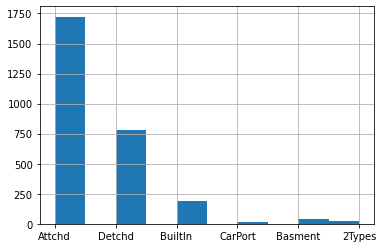

In [543]:
x.GarageType.hist()

In [546]:
x[x.GarageType.isnull()]['BldgType'].value_counts()

1Fam      97
Duplex    28
2fmCon    19
Twnhs     10
TwnhsE     3
Name: BldgType, dtype: int64

In [547]:
x.GarageType.isnull().sum()

157

In [548]:
x.groupby('BldgType')['GarageType'].value_counts()

BldgType  GarageType
1Fam      Attchd        1467
          Detchd         641
          BuiltIn        170
          Basment         29
          2Types          15
          CarPort          6
2fmCon    Detchd          25
          Attchd          12
          2Types           3
          CarPort          2
          BuiltIn          1
Duplex    Detchd          39
          Attchd          28
          2Types           5
          CarPort          5
          BuiltIn          4
Twnhs     Detchd          46
          Attchd          29
          BuiltIn          9
          Basment          1
          CarPort          1
TwnhsE    Attchd         187
          Detchd          28
          Basment          6
          BuiltIn          2
          CarPort          1
Name: GarageType, dtype: int64

In [549]:
x.GarageType.fillna(x.GarageType.mode()[0],inplace=True)

In [550]:
x.GarageType.isnull().sum()

0

In [559]:
isnull = x.isnull().sum().sort_values(ascending=False)
isnull = isnull[isnull > 0]
isnull

Series([], dtype: int64)

0

# Preprocessing

## Transforming

## Scaling

## Encoding

# Regression and Analysis